In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftshift, fftfreq
from scipy import signal
import pyaudio

## Part A

In [2]:
#read human voice
freq, data = wavfile.read("human_voice.wav")
#og sampling frequency, 
freq

48000

Text(0, 0.5, 'Amplitude')

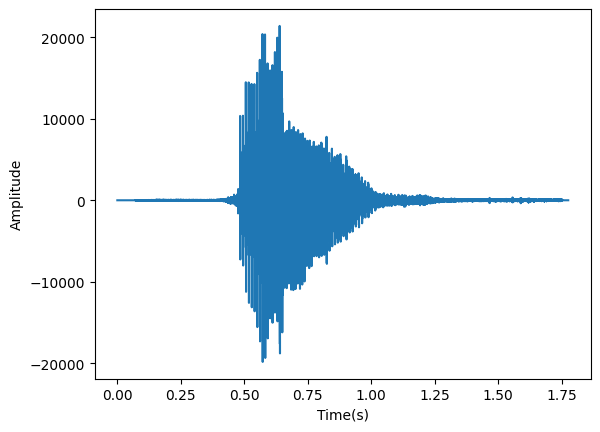

In [4]:
#plot signal
t = np.arange(len(data))/freq
fig, ax = plt.subplots()
plt.plot(t, data)
ax.set_xlabel("Time(s)")
ax.set_ylabel("Amplitude")

In [35]:
#downsample the audio to 
data8k = data[::6]
len(data8k)

14208

Text(0, 0.5, 'Amplitude')

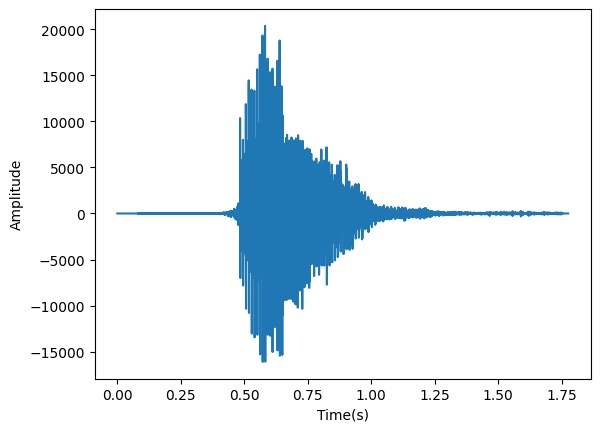

In [37]:
t8 = 6*np.arange(len(data8k))/freq
fig, ax = plt.subplots()
plt.plot(t8, data8k)
ax.set_xlabel("Time(s)")
ax.set_ylabel("Amplitude")

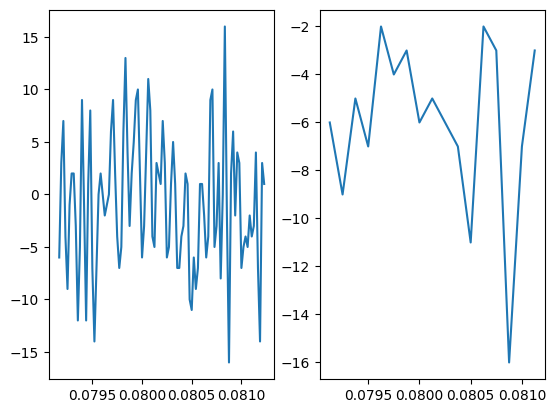

In [44]:
plt.subplot(1,2,1)
plt.plot(t[3800:3900], data[3800:3900])
plt.subplot(1,2,2)
plt.plot(t8[int(3800/6):int(3900/6)], data8k[int(3800/6):int(3900/6)])

## Part B

In [73]:
#read wv files
f, m1 = wavfile.read('M1.wav')
f, m2 = wavfile.read('M2.wav')
f, m3 = wavfile.read('M3.wav')

#change datatypes & calc rms
m1 = np.array(m1).astype('int64')
rms1 = np.sqrt(np.mean(m1**2))
m2 = np.array(m2).astype('int64')
rms2 = np.sqrt(np.mean(m2**2))
m3 = np.array(m3).astype('int64')
rms3 = np.sqrt(np.mean(m3**2))

#print rms
print("m1: ", rms1, " m2: ", rms2, " m3: ", rms3)

m1:  7383.243593119038  m2:  5906.3835785917545  m3:  7383.243593119038


In [106]:
#calculate time delay between m1 and m2
max = 0
sign = 1
index = 0
for i in range(len(m1)):
    sum = np.sum(np.multiply(m1[0:i+1],m2[(len(m1)-1-i):len(m1)]))
    if max < sum:
        index = i
        max = sum
for i in range(len(m1)):
    sum = np.sum(np.multiply(m2[0:i+1],m1[(len(m1)-1-i):len(m1)]))
    if max < sum:
        index = i
        max = sum
        sign = -1

#delay = m2 shift
delay = (len(m1)-index-1)*sign
time_delay = delay/f
time_delay
    

0.0005

In [105]:
#get d = d1 - d2
#speed of sound = 343 m/s

d = time_delay*343
d


0.1715

## Part C

In [108]:
#read data
cafe_f, cafe_data = wavfile.read("Cafe_with_noise.wav") 

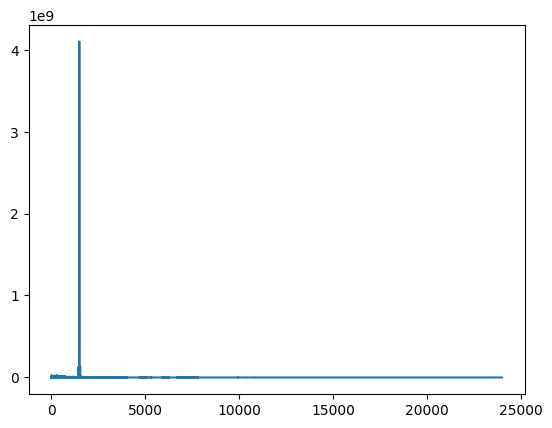

In [268]:
N = len(cafe_data)
T = 1/cafe_f

yf = fft(cafe_data)
xf = fftfreq(N, T)[:N//2]
yabs = np.abs(yf[:N//2])
plt.plot(xf,yabs)

In [269]:
#frequency of noise
xf[yabs.argmax()]

1500.0052409619611

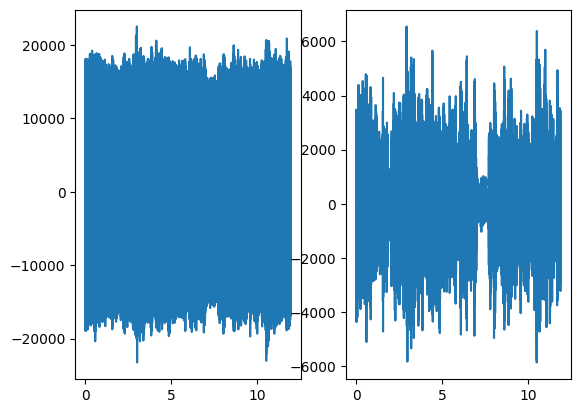

In [271]:
#create lowpass filter
sos = signal.butter(20, 1000, fs=cafe_f, output='sos')
#apply filter on cafe data
y = signal.sosfilt(sos, cafe_data)

#plot original signal and filtered signal
plt.subplot(1,2,1)
plt.plot(np.arange(N)*T, cafe_data)
plt.subplot(1,2,2)
plt.plot(np.arange(N)*T,y)

#write filtered signal to .wav file
wavfile.write("cafe_out.wav", cafe_f, y.astype(np.int16))